#Librerías

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix            # matriz de confusión
from sklearn.metrics import classification_report       # evaluación  Accuracy/Precision/Recall/F1 Score
from sklearn.metrics import ConfusionMatrixDisplay      # matriz de confusión para mapa de calor

# Descarga de Datos

In [ ]:
# Cargar los datos desde el archivo CSV
# data = pd.read_csv('datos.csv')
# data = pd.read_csv('https://raw.githubusercontent.com/mbaroja/TFM/data/resultadoClustering1.csv', delimiter=';')
data = pd.read_csv('https://raw.githubusercontent.com/mbaroja/TFM/data/AgglomerativeClustering_withclusters.csv', delimiter=';')

In [ ]:
data

,V_media,SA_media,SI_media,SP_media,SF_media,CL_media,CH_media,CE_media,CB_media,CD_media,...,EQUIPO_rflidbinih,EDAD_ijawrgtfuz,EDAD_omygfsbzgq,EDAD_pqgwhrmfdu,EDAD_qmsudmubli,EDAD_vjekcogdhn,GENERO_Femenino,GENERO_Masculino,GENERO_No binario,Cluster
0,4.333333,5.000000,4.666667,3.000000,4.000000,5.000000,4.000000,4.333333,3.666667,5.000000,...,0,0,0,1,0,0,0,1,0,1
1,4.000000,5.000000,5.000000,2.000000,4.666667,5.000000,5.333333,6.000000,4.333333,4.000000,...,0,0,0,1,0,0,0,1,0,1
2,4.666667,4.000000,4.666667,3.000000,4.333333,5.000000,5.000000,5.000000,3.333333,2.333333,...,0,0,1,0,0,0,1,0,0,1
3,5.000000,5.000000,5.000000,4.000000,4.000000,4.666667,4.666667,4.666667,4.666667,3.666667,...,0,0,0,1,0,0,0,1,0,4
4,2.000000,1.000000,4.666667,1.000000,1.000000,1.000000,1.333333,2.000000,4.000000,5.000000,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,4.000000,4.666667,3.333333,2.000000,2.000000,5.000000,4.000000,4.333333,3.000000,2.333333,...,0,0,0,0,1,0,0,0,0,4
129,3.000000,4.333333,4.333333,1.333333,2.000000,4.666667,2.000000,3.333333,3.333333,4.333333,...,0,0,0,0,1,0,0,0,0,0
130,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4.666667,3.000000,3.666667,3.000000,3.000000,...,0,0,0,0,1,0,0,0,0,5
131,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
data.describe

<bound method NDFrame.describe of       V_media  SA_media  SI_media  SP_media  SF_media  CL_media  CH_media  \
0    4.333333  5.000000  4.666667  3.000000  4.000000  5.000000  4.000000   
1    4.000000  5.000000  5.000000  2.000000  4.666667  5.000000  5.333333   
2    4.666667  4.000000  4.666667  3.000000  4.333333  5.000000  5.000000   
3    5.000000  5.000000  5.000000  4.000000  4.000000  4.666667  4.666667   
4    2.000000  1.000000  4.666667  1.000000  1.000000  1.000000  1.333333   
..        ...       ...       ...       ...       ...       ...       ...   
128  4.000000  4.666667  3.333333  2.000000  2.000000  5.000000  4.000000   
129  3.000000  4.333333  4.333333  1.333333  2.000000  4.666667  2.000000   
130 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000  4.666667  3.000000   
131  5.000000  5.000000  5.000000  5.000000  5.000000  5.000000  5.000000   
132  5.333333  5.000000  5.333333  5.333333  5.000000  4.333333  4.666667   

     CE_media  CB_media  CD_media  ...  E

# Preprocesado de Datos

In [ ]:
#Preprocesado de datos ya que SVC requiere datos numéricos

#identificar las columnas que contienen valores de texto en el conjunto de datos
# data_text = data.select_dtypes(include='object')
# aplicar la codificación one-hot utilizando el método get_dummies de Pandas para convertir esas columnas en columnas numéricas
# data_encoded = pd.get_dummies(data_text)

In [ ]:
#una vez que preprocesados los datos, combinar las columnas numéricas procesadas con el resto del conjunto de datos.
#data_numeric = data.select_dtypes(exclude='object')
#data_processed = pd.concat([data_numeric, data_text], axis=1)
data_processed = data

In [ ]:
data_processed

,V_media,SA_media,SI_media,SP_media,SF_media,CL_media,CH_media,CE_media,CB_media,CD_media,...,EQUIPO_rflidbinih,EDAD_ijawrgtfuz,EDAD_omygfsbzgq,EDAD_pqgwhrmfdu,EDAD_qmsudmubli,EDAD_vjekcogdhn,GENERO_Femenino,GENERO_Masculino,GENERO_No binario,Cluster
0,4.333333,5.000000,4.666667,3.000000,4.000000,5.000000,4.000000,4.333333,3.666667,5.000000,...,0,0,0,1,0,0,0,1,0,1
1,4.000000,5.000000,5.000000,2.000000,4.666667,5.000000,5.333333,6.000000,4.333333,4.000000,...,0,0,0,1,0,0,0,1,0,1
2,4.666667,4.000000,4.666667,3.000000,4.333333,5.000000,5.000000,5.000000,3.333333,2.333333,...,0,0,1,0,0,0,1,0,0,1
3,5.000000,5.000000,5.000000,4.000000,4.000000,4.666667,4.666667,4.666667,4.666667,3.666667,...,0,0,0,1,0,0,0,1,0,4
4,2.000000,1.000000,4.666667,1.000000,1.000000,1.000000,1.333333,2.000000,4.000000,5.000000,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,4.000000,4.666667,3.333333,2.000000,2.000000,5.000000,4.000000,4.333333,3.000000,2.333333,...,0,0,0,0,1,0,0,0,0,4
129,3.000000,4.333333,4.333333,1.333333,2.000000,4.666667,2.000000,3.333333,3.333333,4.333333,...,0,0,0,0,1,0,0,0,0,0
130,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4.666667,3.000000,3.666667,3.000000,3.000000,...,0,0,0,0,1,0,0,0,0,5
131,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
# Dividir los datos en características (X) y etiquetas (y)
X = data_processed.drop('Cluster', axis=1)  # nombre de la columna objetivo, en este caso AREA
y = data_processed['Cluster']

etiquetas=np.unique(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creación del Modelo



In [ ]:
# Crear el modelo SVM
modelSVC = SVC(probability=True)

In [ ]:
# Entrenar el modelo
history = modelSVC.fit(X_train, y_train)

## Predicciones y resultados

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = modelSVC.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.9629629629629629


In [ ]:
y_test

51     1
69     1
31     4
42     1
117    4
77     0
127    4
56     1
40     1
12     7
81     0
26     1
108    0
100    0
66     1
83     0
4      0
27     0
19     1
123    4
36     1
16     1
18     1
10     1
65     1
44     1
11     7
Name: Cluster, dtype: int64

In [ ]:
# Resultados
resultados = modelSVC.predict(X_test)
resultados_maximos = []
for i in resultados:
  resultados_maximos.append(np.where(i==i.max()))
resultados_maximos= [int(tupla[0]) for tupla in resultados_maximos]

# Generación del informe de clasificación
print("\n", classification_report(y_test, resultados_maximos, zero_division=True))


               precision    recall  f1-score   support

           0       0.26      1.00      0.41         7
           1       1.00      0.00      0.00        14
           4       1.00      0.00      0.00         4
           7       1.00      0.00      0.00         2

    accuracy                           0.26        27
   macro avg       0.81      0.25      0.10        27
weighted avg       0.81      0.26      0.11        27



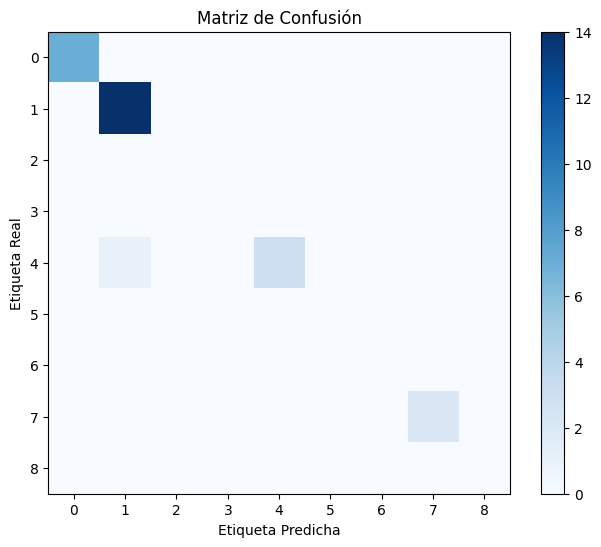

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=etiquetas)
# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
#classes = ['GENERO_Femenino', 'GENERO_Masculino']  # Ajustar las etiquetas de clase según los datos
#tick_marks = np.arange(len(classes))
#plt.xticks(tick_marks, classes)
#plt.yticks(tick_marks, classes)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()

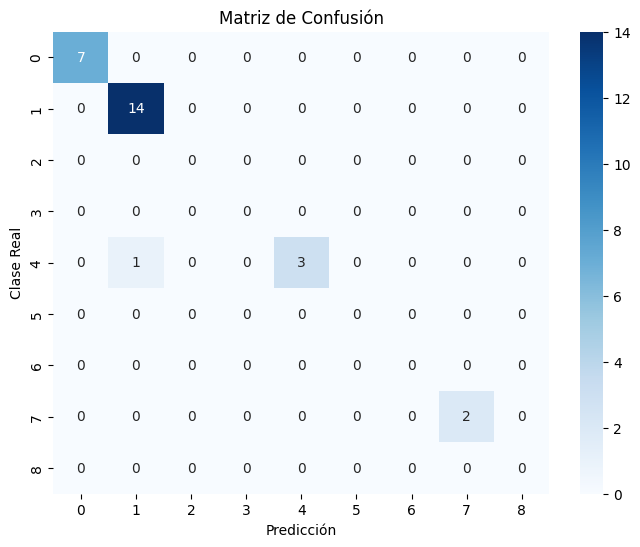

In [ ]:
# Crear el heatmap de la matriz de confusión
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=cm, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Clase Real")
plt.title("Matriz de Confusión")
plt.show()